# Counting seeds

Example on how to use image analysis to identify and count seeds. In this tutorial we use the scikit-image library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage.color import rgb2gray, label2rgb
from skimage.morphology import erosion, disk
from skimage.measure import find_contours, label, regionprops


In [16]:
RGB = mpimg.imread('../datasets/seeds.jpg')


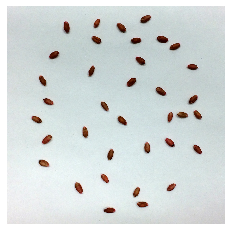

In [17]:
plt.imshow(RGB)
plt.axis('off')
plt.show()


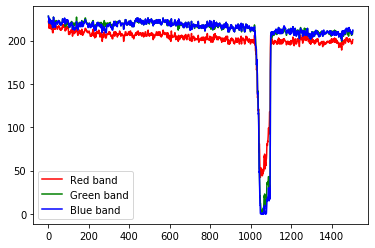

In [18]:
plt.plot(RGB[600,:,0], '-r', label='Red band')
plt.plot(RGB[600,:,1], '-g', label='Green band')
plt.plot(RGB[600,:,2], '-b', label='Blue band')
plt.legend()
plt.show()

In [19]:
grayscale = rgb2gray(RGB)

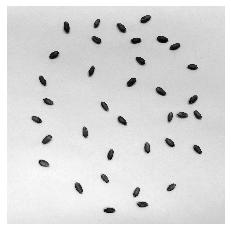

In [20]:
plt.imshow(grayscale, cmap='gray')
plt.axis('off')
plt.show()

In [21]:
print(grayscale.shape)

(1506, 1506)


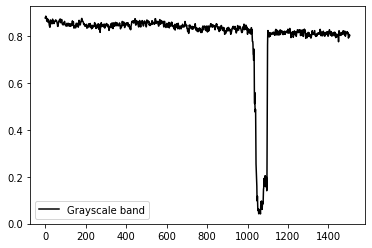

In [22]:
plt.plot(grayscale[601,:], '-k', label='Grayscale band')
plt.legend()
plt.show()

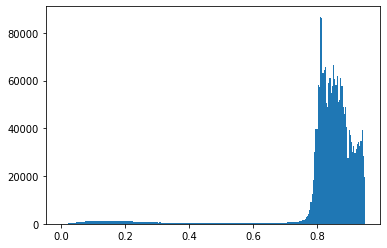

In [23]:
plt.hist(grayscale.flatten(), bins=256, range=(0.0, 0.95))
plt.show()

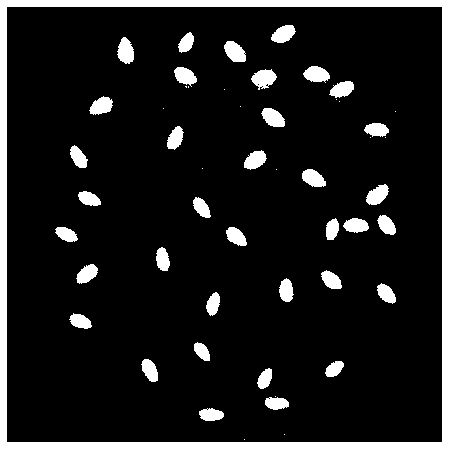

In [26]:
plt.figure(figsize=(8,8))
idx_seeds = grayscale < 0.75
plt.imshow(idx_seeds, cmap='gray')
plt.axis('off')
plt.show()

In [25]:
selem = disk(6)
eroded = erosion(idx_seeds, selem)

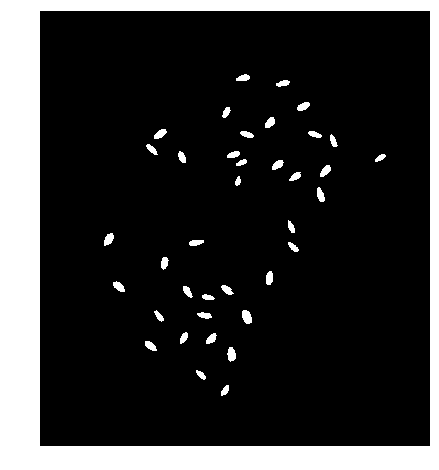

In [26]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(eroded, cmap='gray')
plt.show()

In [27]:
contours = find_contours(eroded, 0)

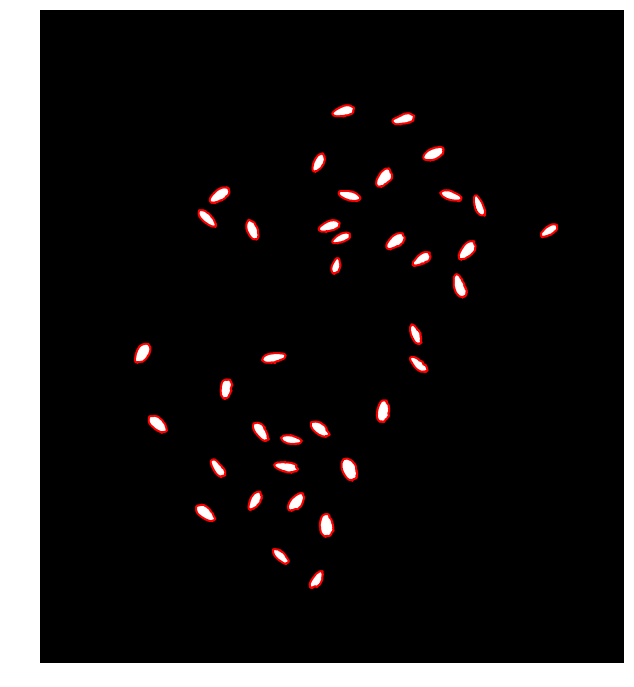

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(eroded, cmap='gray')
plt.axis('off')
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], '-r', linewidth=2)


In [29]:
# Number of seeds
len(contours)

38

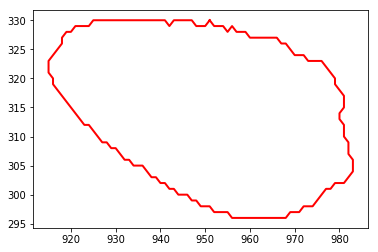

In [30]:
# Single seed
plt.plot(contours[0][:, 1], contours[0][:, 0], '-r', linewidth=2)
plt.show()

In [32]:
# label image regions
label_image = label(eroded)
image_label_overlay = label2rgb(label_image, image=RGB)


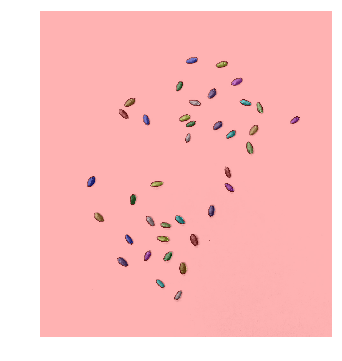

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
plt.axis('off')
plt.show()


In [34]:
region = regionprops(label_image)

In [35]:
from pprint import pprint
pprint(dir(region[0]))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_cache_active',
 '_intensity_image',
 '_intensity_image_double',
 '_label_image',
 '_ndim',
 '_slice',
 '_transpose_moments',
 '_use_xy_warning',
 'area',
 'bbox',
 'bbox_area',
 'centroid',
 'convex_area',
 'convex_image',
 'coords',
 'eccentricity',
 'equivalent_diameter',
 'euler_number',
 'extent',
 'filled_area',
 'filled_image',
 'image',
 'inertia_tensor',
 'inertia_tensor_eigvals',
 'intensity_image',
 'label',
 'local_centroid',
 'major_axis_length',
 'max_intensity',
 'mean_intensity',
 'min_intensity',
 'minor_axis_length',
 'moments',
 'moments_central',
 'moments_hu',


In [45]:
# Eccentricity is the measure of aspect ratio
seed_volume = []
seed_area = []
seed_eccentricity = []
seed_perimeter = []
for item in region:
    major_axis = item.major_axis_length/10 # 10 pixels per millimeter
    minor_axis = item.minor_axis_length/10 # 10 pixels per millimeter
    seed_volume.append(4/3*np.pi*major_axis**2 * minor_axis)
    seed_area.append(item.area)
    seed_eccentricity.append(item.major_axis_length/item.minor_axis_length)
    seed_perimeter.append(item.perimeter)


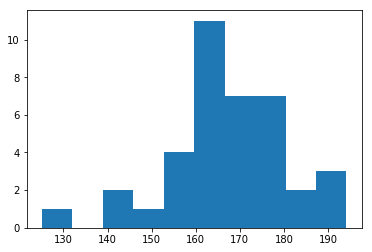

In [46]:
plt.hist(seed_perimeter)
plt.show()

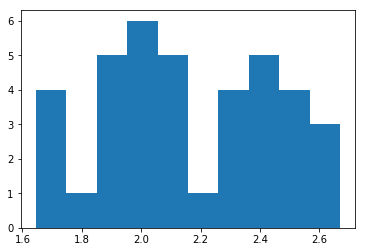

In [43]:
plt.hist(seed_eccentricity)
plt.show()

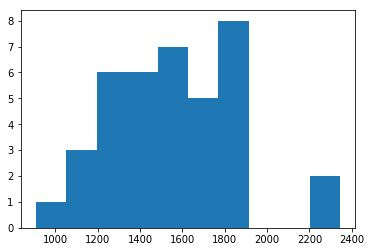

In [44]:
plt.hist(seed_area)
plt.show()